**A CASE STUDY THAT BASICALLY OBSERVES AND MAKES AN ANALYSIS USING THOUSANDS OF TWEETS AS A DATASET TO UNDERSTAND AND PREDICT HUMAN SENTIMENT**

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('twitter.csv')


In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


CHECKING FOR NaN VALUES


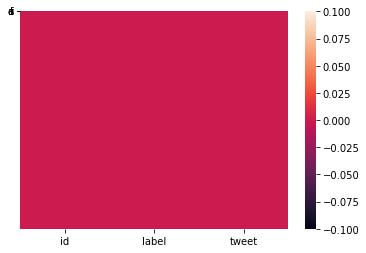

In [ ]:
sns.heatmap(df.isnull(), yticklabels= 'false', cbar= 'false')

heatmap indicates that there are no NaN values in the dataframe

**EXPLORATORY DATA ANALYSIS**

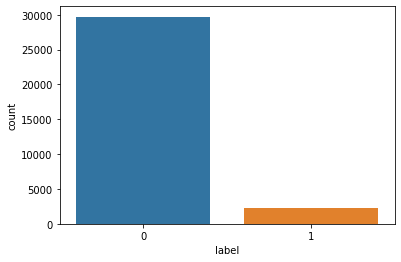

In [ ]:
sns.countplot(data=df, x='label')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b9dd6810>,
      dtype=object)

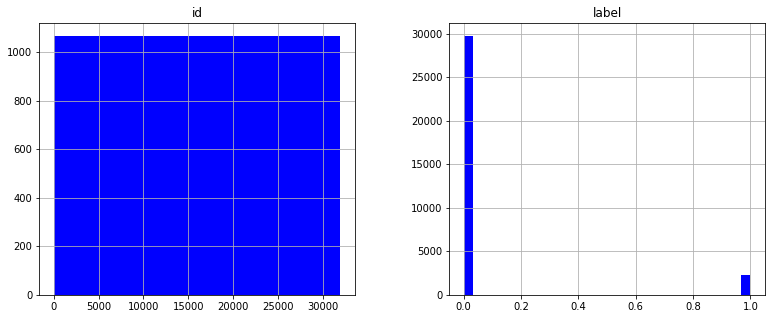

In [ ]:
df.hist(bins = 30, figsize = (13,5), color = 'b')

In [ ]:
df['length']= df['tweet'].apply(len)

In [ ]:
df.columns

Index(['id', 'label', 'tweet', 'length'], dtype='object')

In [ ]:
df.head(5)

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [ ]:
df.describe()

,id,label,length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


we can observe that the minimum length of a tweet was 11 while the max was 274

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


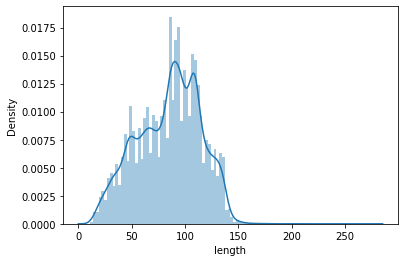

In [ ]:
sns.distplot(df['length'], bins=100)

In [ ]:
df[df['length'] == 11]['tweet']


25195    i love you 
Name: tweet, dtype: object

In [ ]:
df[df['length']== 180]

,id,label,tweet,length
14632,14633,0,@user âï¸ï¸ð¸donald trump âï¸ð¸was...,180


# Storing the positive and negative tweets in different dfs


In [41]:
positive= df[df['label']== 0]
positive.head(20)

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [42]:
negative= df[df['label']== 1]
negative.head(20)

,id,label,tweet,length
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
56,57,1,@user lets fight against #love #peace,39
68,69,1,ð©the white establishment can't have blk fol...,110
77,78,1,"@user hey, white people: you can call people '...",87
82,83,1,how the #altright uses &amp; insecurity to lu...,77
111,112,1,@user i'm not interested in a #linguistics tha...,129


# **PLOTTING THE WORDCLOUD**

In [ ]:
sentences= df['tweet'].tolist()
len(sentences)

31962

In [40]:
sentences_OneString = " ".join(sentences)


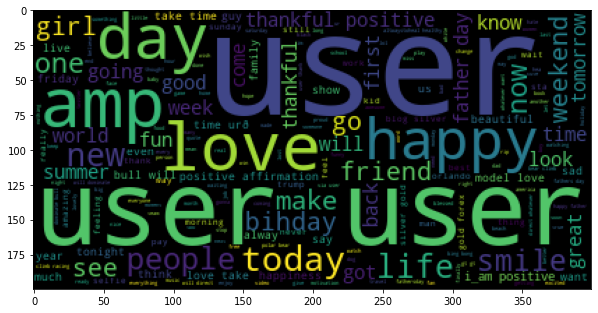

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_OneString))

 plotting the negative word cloud

In [ ]:
negative_1 = negative['tweet'].tolist()
negative_11= " ".join(negative_1)

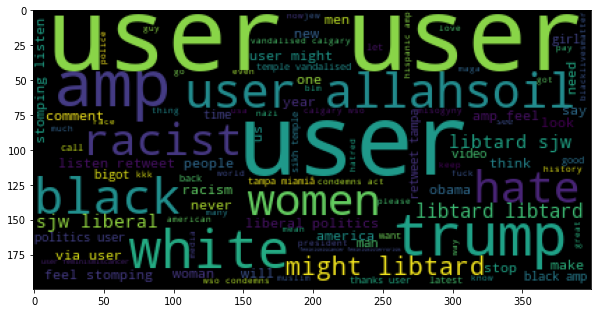

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_11))

REMOVING PUNCTUATIONS AND STOPWORDS

In [ ]:
import nltk #natural language tool kit
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

#here, we are not gonna use re for removing the punctuations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean
 

In [ ]:
df_clean = df['tweet'].apply(message_cleaning)

#  **Cleaned Dataset**

In [39]:
df_clean.head(20)

0     [user, father, dysfunctional, selfish, drags, ...
1     [user, user, thanks, lyft, credit, cant, use, ...
2                                     [bihday, majesty]
3     [model, love, u, take, u, time, urð±, ðð...
4                     [factsguide, society, motivation]
5     [22, huge, fan, fare, big, talking, leave, cha...
6     [user, camping, tomorrow, user, user, user, us...
7     [next, school, year, year, examsð¯, cant, th...
8     [love, land, allin, cavs, champions, cleveland...
9                        [user, user, welcome, im, gr8]
10    [â, ireland, consumer, price, index, mom, cl...
11    [selfish, orlando, standwithorlando, pulseshoo...
12         [get, see, daddy, today, 80days, gettingfed]
13    [user, cnn, calls, michigan, middle, school, b...
14    [comment, australia, opkillingbay, seashepherd...
15    [ouchjunior, angryðgot7, junior, yugyoem, omg]
16                [thankful, paner, thankful, positive]
17                                     [retweet,

**tokenisation**

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(df['tweet']).toarray()


In [ ]:
x= tweets_countvectorizer
y= df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)

##**USING LOGISTIC REGRESSION TO TRAIN THE MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred= classifier.predict(x_test)

# CHECKING THE ACCURACY OF THE MODEL AND THE NUMBER OF MISCLASSIFICATIONS USING ACCURACY SCORE AND CONFUSION MATRIX

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14810    80]
 [  615   476]]


0.9565108566422627

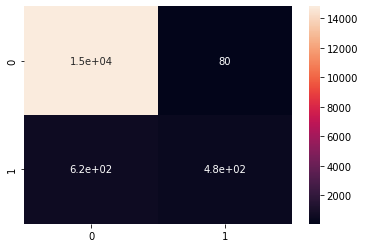

In [ ]:
sns.heatmap(cm, annot=True)

## We can train it using other classifiers too, but Logistic Regression works pretty efficiently with an accuracy score of **0.95** 

